## LED warmup files

File prefix of interest: 012021/cmostjpl002. 1000ms exposures with 10s wait between exposures. Five minutes of dark frames, followed by ten minutes at LED voltage = 1.7 V.  

In [1]:
import sys
sys.path.append('..')
from cmost_image import get_file_list

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

font = {'size' : 14, 'family' : 'sans-serif'}
matplotlib.rc('font', **font)

cmost_dir = '../data'

In [4]:
# Get LED warm up curve data
data_dir = cmost_dir+'/012021'
all_frames, ro_modes, dates, exp_times, voltages, temps, signals, rms = get_file_list(data_dir,file_prefix='cmostjpl002')

In [5]:
# Get average signal of a panel
signals1, signals2, signals3, signals4 = np.zeros(len(signals)), np.zeros(len(signals)), np.zeros(len(signals)), np.zeros(len(signals))
for i, frames in enumerate(all_frames):
    frame = frames[0]
    signals1[i] = np.mean(frame[20:2000,2330:2530])
    signals2[i] = np.mean(frame[20:2000,2580:2800])
    signals3[i] = np.mean(frame[20:2000,2850:3050])
    signals4[i] = np.mean(frame[20:2000,3100:3300])

time = dates - dates[0]
time = [t.total_seconds() for t in time]

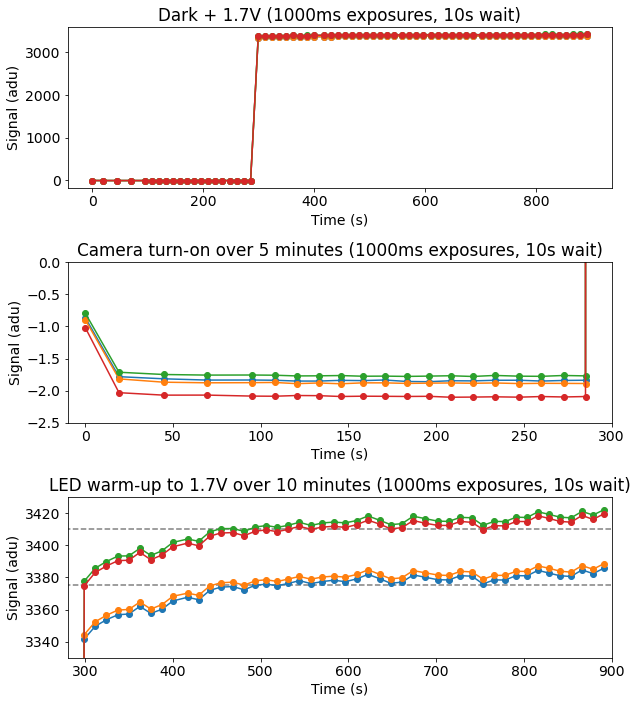

In [6]:
# Plot the mean signal against time
plt.figure(figsize=[9,10])
plt.subplot(311)
plt.title('Dark + {}V ({}ms exposures, 10s wait)'.format(voltages[-1],exp_times[0]))
plt.plot(time,signals1,'o-',time,signals2,'o-',time,signals3,'o-',time,signals4,'o-')
plt.xlabel('Time (s)')
plt.ylabel('Signal (adu)')

# Zoom in on first five minutes (dark frames)
plt.subplot(312)
plt.title('Camera turn-on over 5 minutes ({}ms exposures, 10s wait)'.format(exp_times[0]))
plt.plot(time,signals1,'o-',time,signals2,'o-',time,signals3,'o-',time,signals4,'o-')
plt.xlabel('Time (s)')
plt.ylabel('Signal (adu)')
plt.xlim([-10,300])
plt.ylim([-2.5,0])

# Zoom in on ten minutes after LED switch-on
plt.subplot(313)
plt.title('LED warm-up to {}V over 10 minutes ({}ms exposures, 10s wait)'.format(voltages[-1],exp_times[0]))
plt.plot(time,signals1,'o-',time,signals2,'o-',time,signals3,'o-',time,signals4,'o-')
plt.hlines([3375,3410],250,900,colors='grey',linestyles='dashed')
plt.xlabel('Time (s)')
plt.ylabel('Signal (adu)')
plt.xlim([280,900])
plt.ylim([3330,3430])

plt.tight_layout()
plt.savefig('plots/20210122_LED_warmup_curves.pdf')
plt.show()
plt.close()